## Exploration of North Carolina Urban Street Networks
Inspiration - https://appliednetsci.springeropen.com/articles/10.1007/s41109-019-0189-1

References
- https://towardsdatascience.com/loading-data-from-openstreetmap-with-python-and-the-overpass-api-513882a27fd0
- https://towardsdatascience.com/large-scale-graph-mining-with-spark-750995050656
- https://appliednetsci.springeropen.com/articles/10.1007/s41109-019-0189-1#Sec5

The goal for this project is to conduct a meaningful street network analysis and comparison of three North Carolina cities (Charlotte, Raleigh, and Greensboro). 

Fortunately there is a great library that will automatically parse OpenStreetMap data and return a street graph of a given location all in one line of code. That library being OXMnx which is built on top of MatPlotLibm, GeoPandas, and NetworkX libraries.

In [2]:
import networkx as nx
import osmnx as ox
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
ox.__version__

'1.1.2'

### Charlotte Query

In [3]:
# get charlotte street network from center point (longitude, latitude) 
Charlotte = [35.23284, -80.84857] 
Area = 6500 #meters from center
G_charlotte = ox.graph_from_point(center_point = Charlotte, dist=Area, network_type="drive", truncate_by_edge=True, clean_periphery=True)

In [4]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G_charlotte)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

188385354.3232637

In [5]:
stats = ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

# unpack dicts into individiual keys:values
for k, count in stats["streets_per_node_counts"].items():
    stats["{}way_int_count".format(k)] = count
for k, proportion in stats["streets_per_node_proportions"].items():
    stats["{}way_int_prop".format(k)] = proportion

# delete the no longer needed dict elements
del stats["streets_per_node_counts"]
del stats["streets_per_node_proportions"]

# load as a pandas dataframe
charlotte_stats = pd.DataFrame(pd.Series(stats, name="value")).round(3)
charlotte_stats


,value
n,7522.000
m,18971.000
k_avg,5.044
edge_length_total,2900203.784
edge_length_avg,152.876
streets_per_node_avg,2.848
intersection_count,6115.000
street_length_total,1647168.605
street_segment_count,10619.000
street_length_avg,155.115


### Raleigh Query

In [6]:
# Get Raleigh graph from center
Raleigh =  [35.7803977, -78.6390989]
G_raleigh = ox.graph_from_point(center_point = Raleigh, dist=Area, network_type="drive", truncate_by_edge=True, clean_periphery=True)


In [7]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G_raleigh)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

186669149.47644508

In [8]:
stats = ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

# unpack dicts into individiual keys:values
for k, count in stats["streets_per_node_counts"].items():
    stats["{}way_int_count".format(k)] = count
for k, proportion in stats["streets_per_node_proportions"].items():
    stats["{}way_int_prop".format(k)] = proportion

# delete the no longer needed dict elements
del stats["streets_per_node_counts"]
del stats["streets_per_node_proportions"]

# load as a pandas dataframe
raleigh_stats = pd.DataFrame(pd.Series(stats, name="value")).round(3)
raleigh_stats


,value
n,6922.000
m,16930.000
k_avg,4.892
edge_length_total,2524462.891
edge_length_avg,149.112
streets_per_node_avg,2.777
intersection_count,5504.000
street_length_total,1458856.949
street_segment_count,9551.000
street_length_avg,152.744


### Greensboro Query

In [9]:
# Get Greensboro graph from center
Greensboro = [36.0726354, -79.7919754]
G_greensboro = ox.graph_from_point(center_point = Greensboro, dist=Area, network_type="drive", truncate_by_edge=True, clean_periphery=True)

In [10]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G_greensboro)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

193097524.28670192

In [11]:
stats = ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

# unpack dicts into individiual keys:values
for k, count in stats["streets_per_node_counts"].items():
    stats["{}way_int_count".format(k)] = count
for k, proportion in stats["streets_per_node_proportions"].items():
    stats["{}way_int_prop".format(k)] = proportion

# delete the no longer needed dict elements
del stats["streets_per_node_counts"]
del stats["streets_per_node_proportions"]

# load as a pandas dataframe
greensboro_stats = pd.DataFrame(pd.Series(stats, name="value")).round(3)
greensboro_stats


,value
n,6533.000
m,17131.000
k_avg,5.244
edge_length_total,2765419.724
edge_length_avg,161.428
streets_per_node_avg,2.923
intersection_count,5550.000
street_length_total,1553528.993
street_segment_count,9477.000
street_length_avg,163.926


### Calculate Orientation Entropy for each City

In [12]:
Gs = [G_charlotte, G_raleigh, G_greensboro]
GUs = []
cities = ['Charlotte', 'Raleigh', 'Greensboro']

for g in Gs:
    GUs.append(ox.add_edge_bearings(ox.get_undirected(g)))
    
entropies = []
for gu in GUs:
    entropies.append(ox.bearing.orientation_entropy(gu, num_bins = 36))
    

In [13]:
for i in range(3):
    print(cities[i], entropies[i])

Charlotte 3.5477663082044364
Raleigh 3.4442896910503715
Greensboro 3.303835075089467


In [14]:
entropy_dict = {cities[0]: entropies[0], cities[1]: entropies[1], cities[2]: entropies[2]}

In [15]:
entropy_df = pd.DataFrame(columns = cities)
entropy_df = entropy_df.append(entropy_dict, ignore_index=True)
entropy_df.rename(index={0:'Orientation Entropy'}, inplace=True)

### Comparison

In [16]:
stats = [charlotte_stats, raleigh_stats, greensboro_stats]

In [17]:
for i, s in enumerate(stats):
    s.rename(columns={'value': cities[i]}, inplace = True)

In [18]:
city_stats = charlotte_stats
city_stats['Raleigh'] = raleigh_stats.Raleigh

city_stats['Greensboro'] = greensboro_stats.Greensboro

In [19]:
city_stats = pd.concat([city_stats, entropy_df], axis=0).round(2)

In [20]:
city_stats

,Charlotte,Raleigh,Greensboro
n,7522.00,6922.00,6533.00
m,18971.00,16930.00,17131.00
k_avg,5.04,4.89,5.24
edge_length_total,2900203.78,2524462.89,2765419.72
edge_length_avg,152.88,149.11,161.43
streets_per_node_avg,2.85,2.78,2.92
intersection_count,6115.00,5504.00,5550.00
street_length_total,1647168.60,1458856.95,1553528.99
street_segment_count,10619.00,9551.00,9477.00
street_length_avg,155.12,152.74,163.93


So what do all these stats actually mean?
- n: count of nodes in the graph
- m: count of edges in the graph
- k_avg: average node degree (average number of edges connected to each node)
- edge_length_total: total length of edges
- edge_length_avg: edge_length_total / m
- streets_per_node_avg: graph’s average count of streets per node
- intersection_count: number of intersections in graph
- street_length_total: total street segment length
- street_segment_count: number of street segments in the graph
- street_length_avg: average length of a street segment
- circuity_avg: circuity is defined as the sum of edge lengths divided by the sum of straight line distances between edge endpoints. 
- self_loop_proportion: perfect of edges that are self loops. 
- clean_intersection_count: number of clean intersections
- node_density_km: number of nodes per KM
- intersection_density_km: intersection count per KM
- edge_density_km: number of edges per KM
- street_density_km: number of streets per KM
- clean_intersection_density_km: number of clean intersections per KM
- remaining stats regard the degree of intersections

Cirtuity is a great metric to explore. It measures street curvature which relates to urban patterns and processes. 

Another metric to explore is Orientation Entropy. This quantifies and visualizes the entropy of street orientations to assess how ordered they are.  

### Some Visualizations

In [31]:
'''
    ADD SOME STAT COMPARISON VISUALIZATIONS
'''

'\n    ADD SOME STAT COMPARISON VISUALIZATIONS\n'

#### Street Orientation

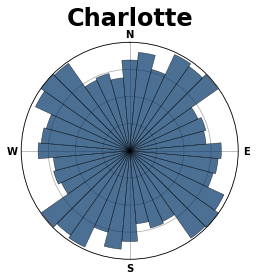

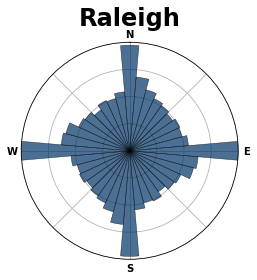

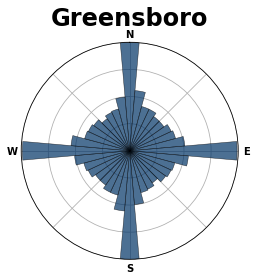

In [22]:
#polar histogram - street orientation - reflects orientation entropy
for i in range(3):
    fig, axes = plt.subplots(subplot_kw={"projection": "polar"})
    fig, ax = ox.bearing.plot_orientation(GUs[i], figsize=(10,10), ax=axes, title=cities[i], area = True)

#### Street Graphs of each City

Charlotte


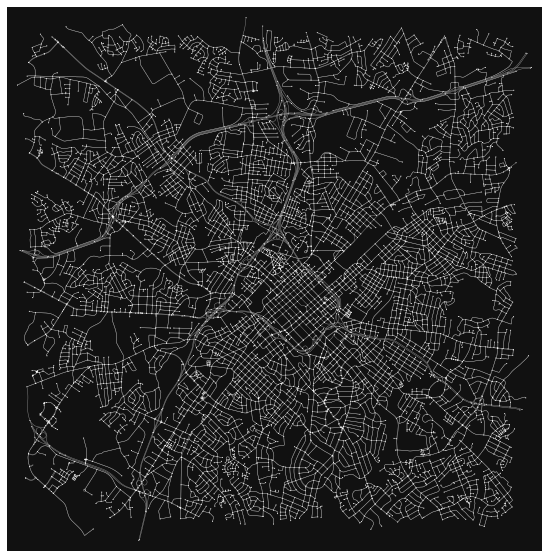

Raleigh


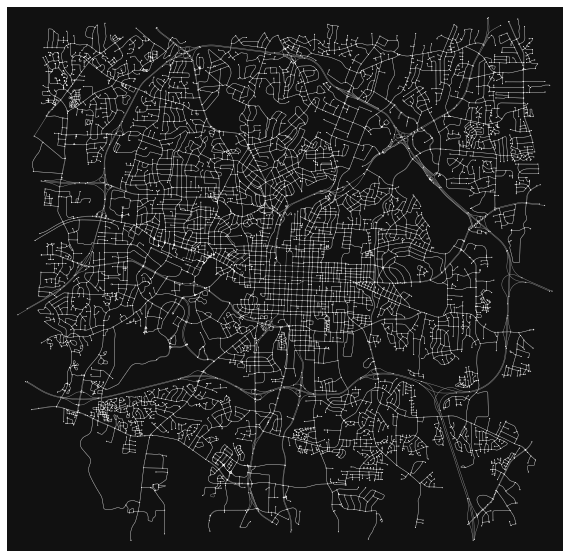

Greensboro


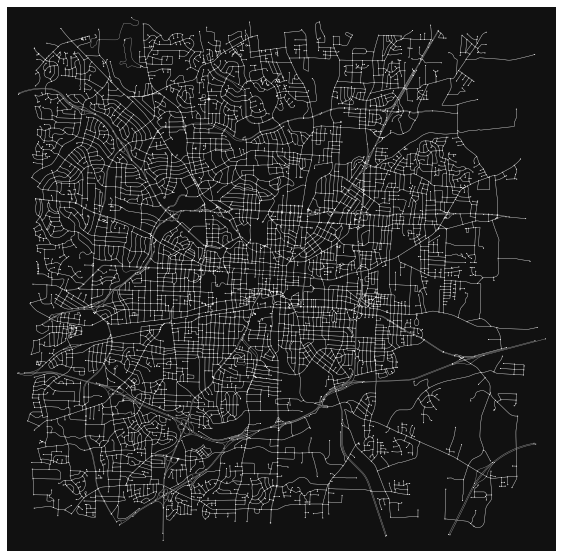

In [27]:
for i in range(3):
    print(cities[i])
    fig, ax = ox.plot_graph(Gs[i], figsize=(10, 10), node_size=1, edge_linewidth=0.4)


#### Street Centrality

Charlotte


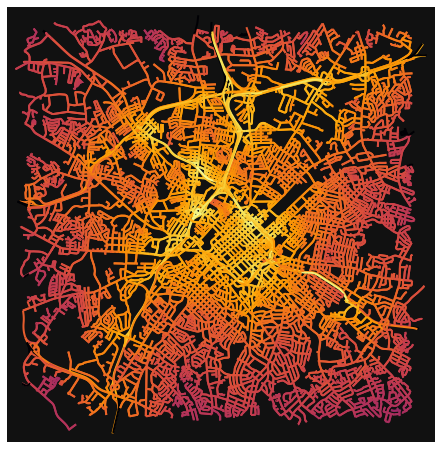

Raleigh


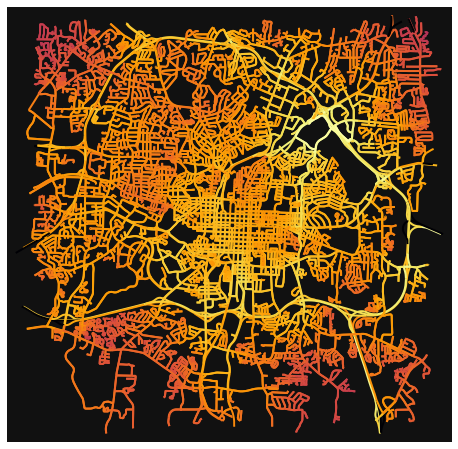

Greensboro


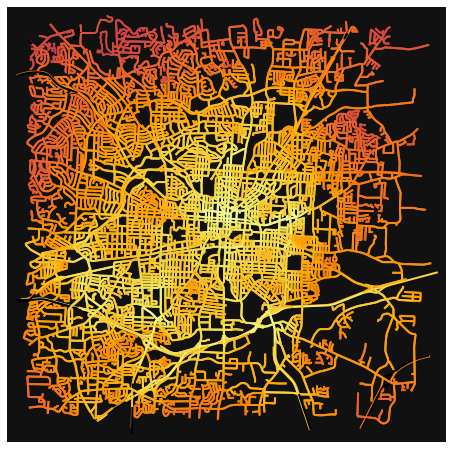

In [28]:
for i in range(3):
    print(cities[i])
    # convert graph to line graph so edges become nodes and vice versa
    edge_centrality = nx.closeness_centrality(nx.line_graph(Gs[i]))
    nx.set_edge_attributes(Gs[i], edge_centrality, "edge_centrality")

    # color edges in original graph with closeness centralities from line graph
    ec = ox.plot.get_edge_colors_by_attr(Gs[i], "edge_centrality", cmap="inferno")
    fig, ax = ox.plot_graph(Gs[i], edge_color=ec, edge_linewidth=2, node_size=0)

### References

In [30]:
#OSMnx
ox.utils.citation()

Citation:

Boeing, G. 2017. OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks. Computers, Environment and Urban Systems, 65, 126-139. https://doi.org/10.1016/j.compenvurbsys.2017.05.004

BibTeX entry for LaTeX users:

@article{boeing_osmnx_2017,
    title = {{OSMnx}: {New} {Methods} for {Acquiring}, {Constructing}, {Analyzing}, and {Visualizing} {Complex} {Street} {Networks}},
    volume = {65},
    doi = {10.1016/j.compenvurbsys.2017.05.004},
    number = {126-139},
    journal = {Computers, Environment and Urban Systems},
    author = {Boeing, Geoff},
    year = {2017}
}


#### Research Paper used as a guide for this work

Boeing, G. Urban spatial order: street network orientation, configuration, and entropy. Appl Netw Sci 4, 67 (2019). https://rdcu.be/cC9qL